In [3]:
import json
import psycopg2
from pymongo import MongoClient
import pandas as pd
from time import time

In [4]:
## Create connections
client = MongoClient("mongodb://localhost:27017/") 
db = client["CSCI_3907_Final_Project"]
coll = db["reviews"]

connection = psycopg2.connect(host='localhost',
                             user='postgres',
                             port=5432,
                             database="CSCI 3907 Final Project",
                             password='postgres')

connection.set_session(autocommit=True)

cur = connection.cursor()

## Mongo and Postgres Comparison

In [17]:
cur.execute("SELECT COUNT(*) FROM users WHERE name is Null")
result = cur.fetchone()
print(result[0])

569


In [4]:
result = coll.count_documents({"reviewerName": {"$exists": False}})
print(result)

7598


In [37]:
start = time()
cur.execute("SELECT COUNT(*) FROM users")
result = cur.fetchone()
stop = time()
result = result[0]
pUsers = stop-start
print(f"Result: {result}. Time: {pUsers}")

start = time()
result = coll.distinct('reviewerID')
stop = time()
result = len(result)
mUsers = stop-start
print(f"Result: {result}. Time: {mUsers}")

Result: 68223. Time: 0.007562875747680664
Result: 68223. Time: 1.5788941383361816


In [35]:
start = time()
cur.execute("SELECT COUNT(*) FROM products")
result = cur.fetchone()
stop = time()
result = result[0]
pProds = stop-start
print(f"Result: {result}. Time: {pProds}")

start = time()
result = coll.distinct('asin')
stop = time()
result = len(result)
mProds = stop-start
print(f"Result: {result}. Time: {mProds}")

Result: 61934. Time: 0.006899118423461914
Result: 61934. Time: 1.6834559440612793


<AxesSubplot:title={'center':'Postgres vs Mongo Execution Time'}, ylabel='Time (s)'>

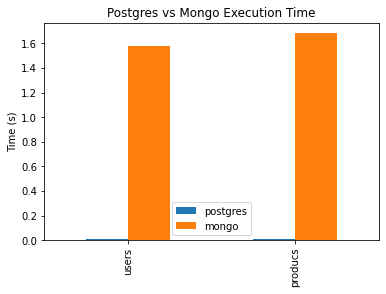

In [41]:
postgres = [pUsers, pProds]
mongo = [mUsers, mProds]
index = ['users', 'producs']
df = pd.DataFrame({'postgres': postgres, 'mongo': mongo}, index=index)
df.plot.bar(title = "Postgres vs Mongo Execution Time", ylabel= "Time (s)")

## Data Analysis

### Users

In [10]:
cur.execute("SELECT reviews.uid, pid, rating,name FROM reviews JOIN users ON reviews.uid = users.uid")
results = cur.fetchall()
users = pd.DataFrame.from_dict(results)
users.columns = ['uid', 'pid', 'rating', 'name']
users = users[['pid', 'rating', 'name', 'uid']]
users.head()

,pid,rating,name,uid
0,B000F83SZQ,5,Avidreader,A1F6404F1VG29J
1,B000F83SZQ,4,dot,A795DMNCJILA6
2,B000F83SZQ,4,ubavka seirovska,A1RK2OCZDSGC6R
3,B000F83SZQ,4,Wolfmist,A2HSAKHC3IBRE6
4,B000FA64PA,5,dsa,A1UG4Q4D3OAH3A


In [11]:
topUsers = pd.DataFrame(users['uid'].value_counts().head()).reset_index()
topUsers = topUsers.rename(columns={'index':'uid', 'uid':'reviews'})
topUsers

,uid,reviews
0,A13QTZ8CIMHHG4,1173
1,A2WZJDFX12QXKD,1007
2,A320TMDV6KCFU,847
3,A3PTWPKPXOG8Y5,789
4,A1JLU5H1CCENWX,782


In [12]:
bottomUsers = pd.DataFrame(users['uid'].value_counts().tail(5)).reset_index()
bottomUsers = bottomUsers.rename(columns={'index':'uid', 'uid':'reviews'})
bottomUsers

,uid,reviews
0,A2MD31X6DLFXC4,5
1,A324ODS0NPPT9,5
2,A8CW2IGDIY410,5
3,AONX7HTE0RVZR,5
4,AXAF9BMFDB170,5


In [13]:
topUsers =  topUsers.merge(users, how="left", on=["uid"]).reset_index()
topUsers

,index,uid,reviews,pid,rating,name
0,0,A13QTZ8CIMHHG4,1173,B000R93D4Y,4,"LAS Reviewer ""The Long and the Short Of It Re..."
1,1,A13QTZ8CIMHHG4,1173,B000VKVZQM,4,"LAS Reviewer ""The Long and the Short Of It Re..."
2,2,A13QTZ8CIMHHG4,1173,B0012W11D0,5,"LAS Reviewer ""The Long and the Short Of It Re..."
3,3,A13QTZ8CIMHHG4,1173,B001892DGG,5,"LAS Reviewer ""The Long and the Short Of It Re..."
4,4,A13QTZ8CIMHHG4,1173,B001CN45IC,5,"LAS Reviewer ""The Long and the Short Of It Re..."
...,...,...,...,...,...,...
4593,4593,A1JLU5H1CCENWX,782,B00LS3N4WY,5,andrewsheath
4594,4594,A1JLU5H1CCENWX,782,B00LU6N5UU,5,andrewsheath
4595,4595,A1JLU5H1CCENWX,782,B00LYGQXQY,5,andrewsheath
4596,4596,A1JLU5H1CCENWX,782,B00LZ19FE0,5,andrewsheath


In [22]:
topAvg = topUsers.groupby('uid').mean().round(decimals=2).reset_index()
topAvg = topAvg[['uid', 'reviews', 'rating']]
topAvg

,uid,reviews,rating
0,A13QTZ8CIMHHG4,1173.0,4.14
1,A1JLU5H1CCENWX,782.0,4.90
2,A2WZJDFX12QXKD,1007.0,4.96
3,A320TMDV6KCFU,847.0,4.81
4,A3PTWPKPXOG8Y5,789.0,4.91


In [20]:
bottomUsers =  bottomUsers.merge(users, how="left", on=["uid"]).reset_index()
bottomUsers

,index,uid,reviews,pid,rating,name
0,0,A2MD31X6DLFXC4,5,B005DEWINK,3,pollywolly
1,1,A2MD31X6DLFXC4,5,B006GWO5WK,5,pollywolly
2,2,A2MD31X6DLFXC4,5,B007HUD7EM,4,pollywolly
3,3,A2MD31X6DLFXC4,5,B008XOWVVG,1,pollywolly
4,4,A2MD31X6DLFXC4,5,B00CNWGCNW,1,pollywolly
5,5,A324ODS0NPPT9,5,B006YZ0OOM,4,vicky ferrer
6,6,A324ODS0NPPT9,5,B006ZPRRVY,3,vicky ferrer
7,7,A324ODS0NPPT9,5,B00BR70E2E,4,vicky ferrer
8,8,A324ODS0NPPT9,5,B00BVUL6BU,2,vicky ferrer
9,9,A324ODS0NPPT9,5,B00G3DC7RW,3,vicky ferrer


In [21]:
bottomAvg = bottomUsers.groupby('uid').mean().reset_index()
bottomAvg = bottomAvg[['uid', 'reviews', 'rating']]
bottomAvg

,uid,reviews,rating
0,A2MD31X6DLFXC4,5.0,2.8
1,A324ODS0NPPT9,5.0,3.2
2,A8CW2IGDIY410,5.0,4.2
3,AONX7HTE0RVZR,5.0,3.2
4,AXAF9BMFDB170,5.0,4.8


### Products

In [24]:
cur.execute("SELECT reviews.pid, rating FROM reviews JOIN products ON reviews.pid = products.pid")
results = cur.fetchall()
products = pd.DataFrame.from_dict(results)
products.columns = ['pid', 'rating']
products = products[['pid', 'rating']]
products.head()

,pid,rating
0,B000F83SZQ,5
1,B000F83SZQ,4
2,B000F83SZQ,4
3,B000F83SZQ,5
4,B000F83SZQ,4


In [27]:
topReviewed = pd.DataFrame(products['pid'].value_counts().head()).reset_index()
topReviewed = topReviewed.rename(columns={'index':'pid', 'pid':'reviews'})
topReviewed

,pid,reviews
0,B006GWO5WK,1113
1,B00BTIDW4S,781
2,B00BT0J8ZS,516
3,B00JDYC5OI,502
4,B00H0V069M,481


In [28]:
bottomReviewed = pd.DataFrame(products['pid'].value_counts().tail(5)).reset_index()
bottomReviewed = bottomReviewed.rename(columns={'index':'pid', 'pid':'reviews'})
bottomReviewed

,pid,reviews
0,B007TPAQV2,5
1,B00IEUD2JE,5
2,B00IEXBHVQ,5
3,B00EZWXE8Y,5
4,B00IO4WJ0S,5


In [29]:
topReviewed =  topReviewed.merge(products, how="left", on=["pid"]).reset_index()
topReviewed

,index,pid,reviews,rating
0,0,B006GWO5WK,1113,5
1,1,B006GWO5WK,1113,5
2,2,B006GWO5WK,1113,5
3,3,B006GWO5WK,1113,5
4,4,B006GWO5WK,1113,5
...,...,...,...,...
3388,3388,B00H0V069M,481,4
3389,3389,B00H0V069M,481,4
3390,3390,B00H0V069M,481,5
3391,3391,B00H0V069M,481,4


In [37]:
topRevAvg = topReviewed.groupby('pid').mean().round(decimals=2).reset_index()
topRevAvg = topRevAvg[['pid', 'reviews', 'rating']]
topRevAvg

,pid,reviews,rating
0,B006GWO5WK,1113.0,4.54
1,B00BT0J8ZS,516.0,4.58
2,B00BTIDW4S,781.0,4.43
3,B00H0V069M,481.0,4.69
4,B00JDYC5OI,502.0,4.64


In [31]:
bottomReviewed =  bottomReviewed.merge(products, how="left", on=["pid"]).reset_index()
bottomReviewed

,index,pid,reviews,rating
0,0,B007TPAQV2,5,5
1,1,B007TPAQV2,5,3
2,2,B007TPAQV2,5,5
3,3,B007TPAQV2,5,4
4,4,B007TPAQV2,5,5
5,5,B00IEUD2JE,5,5
6,6,B00IEUD2JE,5,5
7,7,B00IEUD2JE,5,5
8,8,B00IEUD2JE,5,5
9,9,B00IEUD2JE,5,5


In [38]:
bottomRevAvg = bottomReviewed.groupby('pid').mean().round(decimals=2).reset_index()
bottomRevAvg = bottomRevAvg[['pid', 'reviews', 'rating']]
bottomRevAvg

,pid,reviews,rating
0,B007TPAQV2,5.0,4.4
1,B00EZWXE8Y,5.0,3.6
2,B00IEUD2JE,5.0,5.0
3,B00IEXBHVQ,5.0,4.6
4,B00IO4WJ0S,5.0,4.8


### Reviews

In [77]:
cur.execute("SELECT time FROM reviews")
results = cur.fetchall()
reviews = pd.DataFrame.from_dict(results)
reviews.head(10)

,0
0,2014-05-05
1,2014-01-06
2,2014-04-04
3,2014-02-19
4,2014-03-19
5,2014-05-26
6,2014-06-10
7,2014-03-22
8,2013-10-11
9,2011-02-13


In [79]:
topDates = pd.DataFrame(reviews[0].value_counts().head(10)).reset_index()
topDates = topDates.rename(columns={'index':'date', 0:'reviews'})
topDates

,date,reviews
0,2014-07-07,2728
1,2014-07-14,2588
2,2014-07-09,2571
3,2014-04-28,2562
4,2014-07-08,2555
5,2014-06-23,2538
6,2014-05-22,2518
7,2014-07-01,2499
8,2014-06-02,2480
9,2014-06-16,2449


In [81]:
topDates['date'] = pd.to_datetime(topDates['date'])
topDates['day-of-week'] = topDates['date'].dt.day_name()
topDates = topDates[['date', 'reviews', 'day-of-week']]
topDates

,date,reviews,day-of-week
0,2014-07-07,2728,Monday
1,2014-07-14,2588,Monday
2,2014-07-09,2571,Wednesday
3,2014-04-28,2562,Monday
4,2014-07-08,2555,Tuesday
5,2014-06-23,2538,Monday
6,2014-05-22,2518,Thursday
7,2014-07-01,2499,Tuesday
8,2014-06-02,2480,Monday
9,2014-06-16,2449,Monday
